## Estatísticas de Transações Pix

Estudo sobre as estatísticas de transações Pix da API do Banco Central (BCB) acerca do volume financeiro e da quantidade de transações Pix liquidadas mensalmente, incluindo informações sobre o Sistema de Pagamentos Instantâneos (SPI) e transações fora do SPI.

Instrumento de periodicidade **mensal**, com atualização disponibilizada pelo Banco Central do Brasil.

Inclui:

- Quantidade e valor financeiro de transações Pix liquidadas no SPI.
- Recortes por tipo de pessoa (PF/PJ), região, idade, forma de iniciação, natureza e finalidade da transação.

### Parâmetros da API

| Nome       | Tipo    | Título     | Descrição |
|------------|---------|------------|-----------|
| Database   | texto   | Data-base  | Data-base de referência no formato AAAAMM |
| $format    | texto   | $format    | Tipo de conteúdo que será retornado |
| $select    | texto   | $select    | Propriedades que serão retornadas |
| $filter    | texto   | $filter    | Filtro de seleção de entidades. e.g. Nome eq 'João'. [Clique aqui](https://olinda.bcb.gov.br/olinda/servico/ajuda) para ver as opções de operadores e funções. |
| $orderby   | texto   | $orderby   | Propriedades para ordenação das entidades. e.g. Nome asc, Idade desc |
| $skip      | inteiro | $skip      | Índice (maior ou igual a zero) da primeira entidade que será retornada |
| $top       | inteiro | $top       | Número máximo (maior que zero) de entidades que serão retornadas |

---

### Dicionário de Dados

| Nome         | Tipo    | Título                             | Descrição |
|--------------|---------|------------------------------------|-----------|
| AnoMes       | inteiro | Data-base - ano/mês                | Data-base de referência no formato AAAAMM |
| PAG_PFPJ     | texto   | Tipo de Pessoa do Pagador          | PF = Pessoa Física, PJ = Pessoa Jurídica |
| REC_PFPJ     | texto   | Tipo de Pessoa do Recebedor        | PF = Pessoa Física, PJ = Pessoa Jurídica |
| PAG_REGIAO   | texto   | Região do Pagador                  | Região do domicílio do pagador |
| REC_REGIAO   | texto   | Região do Recebedor                | Região do domicílio do recebedor |
| PAG_IDADE    | texto   | Idade do Pagador                   | Faixa etária do usuário pagador |
| REC_IDADE    | texto   | Idade do Recebedor                 | Faixa etária do usuário recebedor |
| FORMAINICIACAO | texto | Forma de Iniciação da Transação    | INIC = Iniciador com dados do recebedor, QRES = QR Code Estático, QRDN = QR Code Dinâmico, MANU = Inserção manual, DICT = Chave Pix |
| NATUREZA     | texto   | Natureza da Transação              | P2P = Pessoa para Pessoa, B2B = Empresa para Empresa, P2B = Pessoa para Empresa, B2P = Empresa para Pessoa, P2G = Pessoa para Governo, B2G = Empresa para Governo |
| FINALIDADE   | texto   | Finalidade da Transação            | Transferência, saque ou troco |
| VALOR        | decimal | Valor das Transações Pix           | Volume financeiro (R$ milhões) de transações Pix liquidadas mensalmente |
| QUANTIDADE   | decimal | Quantidade Total de Transações Pix | Quantidade (milhares) de transações Pix liquidadas mensalmente |

---

**Fontes:** 
- [BCB - Transação Pix](https://dadosabertos.bcb.gov.br/dataset/pix/resource/9eb0f16d-4a38-4936-be2a-6c0dd18f87f7?inner_span=True)
- [BCB - Estatísticas Pix](https://dadosabertos.bcb.gov.br/dataset/pix)


In [2]:
import pandas as pd
import sqlite3

con = sqlite3.connect('src/datasets/dadosPix.db')
query = "select * from transacoes_pix"
df = pd.read_sql(query, con)
con.close()

Primeiro vamos explorar a estrutura do conjunto de dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AnoMes          10000 non-null  object 
 1   PAG_PFPJ        10000 non-null  object 
 2   REC_PFPJ        10000 non-null  object 
 3   PAG_REGIAO      10000 non-null  object 
 4   REC_REGIAO      10000 non-null  object 
 5   PAG_IDADE       10000 non-null  object 
 6   REC_IDADE       10000 non-null  object 
 7   FORMAINICIACAO  10000 non-null  object 
 8   NATUREZA        10000 non-null  object 
 9   FINALIDADE      10000 non-null  object 
 10  VALOR           10000 non-null  float64
 11  QUANTIDADE      10000 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 937.6+ KB


Aparentemente não temos dados, faltantes, mas vamos comprovar:

In [4]:
df.isnull().sum()

AnoMes            0
PAG_PFPJ          0
REC_PFPJ          0
PAG_REGIAO        0
REC_REGIAO        0
PAG_IDADE         0
REC_IDADE         0
FORMAINICIACAO    0
NATUREZA          0
FINALIDADE        0
VALOR             0
QUANTIDADE        0
dtype: int64

Ajustando a coluna que está em milhões.

In [5]:
monetary_columns = ['VALOR']
for col in monetary_columns:
    df[col] = df[col] * 1_000_000
    df[col] = df[col].round(2)

In [6]:
df

,AnoMes,PAG_PFPJ,REC_PFPJ,PAG_REGIAO,REC_REGIAO,PAG_IDADE,REC_IDADE,FORMAINICIACAO,NATUREZA,FINALIDADE,VALOR,QUANTIDADE
0,2025-01-01 00:00:00,PF,PF,CENTRO-OESTE,SUDESTE,entre 30 e 39 anos,entre 50 e 59 anos,QRES,P2P,Pix,1.765604e+12,30585
1,2025-01-01 00:00:00,PF,PF,Nao informado,Nao informado,até 19 anos,entre 30 e 39 anos,MANU,P2P,Pix,3.268242e+10,388
2,2025-01-01 00:00:00,PF,PF,SUDESTE,SUL,entre 50 e 59 anos,entre 40 e 49 anos,MANU,P2P,Pix,1.097083e+13,25569
3,2025-01-01 00:00:00,PJ,PF,Nao informado,SUDESTE,Nao se aplica,até 19 anos,QRES,B2P,Pix,7.578677e+10,991
4,2025-01-01 00:00:00,PF,PF,NORDESTE,SUDESTE,Nao informado,entre 40 e 49 anos,MANU,P2P,Pix,4.915000e+08,6
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2025-01-01 00:00:00,PF,PF,SUL,CENTRO-OESTE,entre 30 e 39 anos,entre 20 e 29 anos,DICT,P2P,Pix,2.155828e+13,94663
9996,2025-01-01 00:00:00,PJ,PJ,Nao informado,SUL,Nao se aplica,Nao se aplica,QRES,B2G,Pix,3.481750e+09,139
9997,2025-01-01 00:00:00,PF,PF,SUL,SUL,até 19 anos,entre 40 e 49 anos,Nao disponivel,P2P,Nao disponivel,1.179926e+12,10604
9998,2025-01-01 00:00:00,PF,PF,NORDESTE,NORTE,entre 30 e 39 anos,entre 40 e 49 anos,Nao disponivel,P2P,Nao disponivel,2.695647e+11,606


Ajustando as colunas que estão em milhares.

In [7]:
thousand_columns = ['QUANTIDADE']
for col in thousand_columns:
    df[col] = df[col] * 1_000

In [8]:
df

,AnoMes,PAG_PFPJ,REC_PFPJ,PAG_REGIAO,REC_REGIAO,PAG_IDADE,REC_IDADE,FORMAINICIACAO,NATUREZA,FINALIDADE,VALOR,QUANTIDADE
0,2025-01-01 00:00:00,PF,PF,CENTRO-OESTE,SUDESTE,entre 30 e 39 anos,entre 50 e 59 anos,QRES,P2P,Pix,1.765604e+12,30585000
1,2025-01-01 00:00:00,PF,PF,Nao informado,Nao informado,até 19 anos,entre 30 e 39 anos,MANU,P2P,Pix,3.268242e+10,388000
2,2025-01-01 00:00:00,PF,PF,SUDESTE,SUL,entre 50 e 59 anos,entre 40 e 49 anos,MANU,P2P,Pix,1.097083e+13,25569000
3,2025-01-01 00:00:00,PJ,PF,Nao informado,SUDESTE,Nao se aplica,até 19 anos,QRES,B2P,Pix,7.578677e+10,991000
4,2025-01-01 00:00:00,PF,PF,NORDESTE,SUDESTE,Nao informado,entre 40 e 49 anos,MANU,P2P,Pix,4.915000e+08,6000
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2025-01-01 00:00:00,PF,PF,SUL,CENTRO-OESTE,entre 30 e 39 anos,entre 20 e 29 anos,DICT,P2P,Pix,2.155828e+13,94663000
9996,2025-01-01 00:00:00,PJ,PJ,Nao informado,SUL,Nao se aplica,Nao se aplica,QRES,B2G,Pix,3.481750e+09,139000
9997,2025-01-01 00:00:00,PF,PF,SUL,SUL,até 19 anos,entre 40 e 49 anos,Nao disponivel,P2P,Nao disponivel,1.179926e+12,10604000
9998,2025-01-01 00:00:00,PF,PF,NORDESTE,NORTE,entre 30 e 39 anos,entre 40 e 49 anos,Nao disponivel,P2P,Nao disponivel,2.695647e+11,606000


## Estatísticas Descritivas

Nosso conjunto de dados está com algumas colunas que não farão parte da nossa análise. Como a consulta é apenas para o mês de janeiro de 2025, não há sentido preservar a coluna AnoMes, visto que todos os valores são referentes ao mesmo período.

Daremos foco em:
- Região e idade de pagadores e recebedores; 
- Natureza, valores e quantidades de Pix.

In [9]:


users_cols = ['PAG_PFPJ', 'REC_PFPJ', 'PAG_REGIAO', 'REC_REGIAO', 'PAG_IDADE', 'REC_IDADE']

pix_cols = ['NATUREZA','VALOR', 'QUANTIDADE']

selected_cols = users_cols+pix_cols
df_pix = df[selected_cols].copy()

In [10]:
df_pix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PAG_PFPJ    10000 non-null  object 
 1   REC_PFPJ    10000 non-null  object 
 2   PAG_REGIAO  10000 non-null  object 
 3   REC_REGIAO  10000 non-null  object 
 4   PAG_IDADE   10000 non-null  object 
 5   REC_IDADE   10000 non-null  object 
 6   NATUREZA    10000 non-null  object 
 7   VALOR       10000 non-null  float64
 8   QUANTIDADE  10000 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 703.3+ KB


In [11]:
df_pix.describe()

,VALOR,QUANTIDADE
count,1.000000e+04,1.000000e+04
mean,1.901879e+14,4.525978e+08
std,4.259884e+15,3.915257e+09
min,1.000000e+04,1.000000e+03
25%,1.675474e+10,8.900000e+04
50%,3.245811e+11,1.745000e+06
75%,5.021311e+12,2.575125e+07
max,3.691449e+17,1.765396e+11


## Estudo das Médias

Existem formas diferentes de encontrar as médias em questão, como por exemplo:

In [12]:
soma1 = df_pix['VALOR'].sum()
soma2 = df_pix['QUANTIDADE'].sum()

soma1/soma2

np.float64(420213.99353522377)

In [13]:
(df_pix['VALOR'] / df_pix['QUANTIDADE']).mean()

np.float64(1563718.839898675)

## Diferença entre Média Ponderada e Média Simples (em um único mês)

Mesmo ao considerar um **único mês**, a diferença entre as duas abordagens de média pode ser **bastante significativa** devido ao efeito de outliers e à distribuição desigual das quantidades de transações. 

- **Média ponderada** $\frac{\sum \text{VALOR}}{\sum \text{QUANTIDADE}}$ :  
  A média ponderada considera o **volume de transações**, ou seja, transações com maior quantidade têm mais peso. Isso faz com que a média seja mais representativa do comportamento típico das transações, refletindo de forma mais fiel o **valor médio real** das transações.

- **Média simples** $\frac{1}{n} \sum_i \left( \frac{\text{VALOR}_i}{\text{QUANTIDADE}_i} \right)$ :  
  A média simples considera cada transação com **peso igual**, independentemente do volume de unidades transacionadas. Em casos de transações com valores elevados e poucas unidades, a média simples pode ser **inflacionada**, distorcendo a visão real do comportamento das transações.

### Exemplo de Como a Diferença se Dá:

| VALOR  | QUANTIDADE | VALOR/QUANTIDADE |
|--------|------------|------------------|
| 100    | 1          | 100              |
| 2000   | 100        | 20               |

- **Média simples**: $\frac{100 + 20}{2} = 60$
- **Média ponderada**: $\ \frac{100 + 2000}{1 + 100} = \frac{2100}{101} \approx 20.79 $

No caso da média simples, **transações pequenas** (como a de valor 100) **inflacionam** a média, porque cada transação tem **peso igual**, enquanto na média ponderada, as transações de **maior quantidade** (como a de valor 2000) têm **mais peso**, refletindo melhor o comportamento global do mês.

### Conclusão

A média ponderada é mais adequada quando se deseja obter uma visão real do valor médio das transações, considerando o volume de cada uma. A média simples é mais útil quando cada transação deve ter peso igual, mas deve ser usada com cautela, pois pode ser **sensível a outliers** e distorcer o comportamento geral das transações. Fato que será estudado em maior detalhe a seguir.



## Variância e Desvio-padrão

Pix

In [14]:
pix = df_pix['VALOR'] / df_pix['QUANTIDADE']
print ("Média:", pix.mean())
print ("Variância:", pix.var(ddof=0))
print ("Desvio Padrão:", pix.std(ddof=0))

Média: 1563718.839898675
Variância: 826856370619623.0
Desvio Padrão: 28755110.339200977


## Interpretação prática

### Alta dispersão nos valores

O **desvio-padrão** é aproximadamente **R$ 28,76 milhões**, o que é consideravelmente maior que a **média** de **R$ 1.563.718,84**. O **coeficiente de variação** pode ser calculado da seguinte forma:

$$
\frac{28.755.110,34}{1.563.718,84} \approx 18,4
$$

Este valor extremamente elevado (18,4) indica uma **variação altíssima** entre os registros. Isso sugere que a distribuição dos valores de transação está muito dispersa, com alguns valores muito elevados distorcendo significativamente a média.

---

### Intervalo de confiança típico

Assumindo uma **distribuição simétrica** (novamente, uma suposição que pode não ser válida), o intervalo de **68% dos registros** poderia ser calculado da seguinte forma:

$$
1.563.718,84 \pm 28.755.110,34 \Rightarrow [ -27.191.391,50 \;\text{até}\; 30.318.830,34 ]
$$

Como o **limite inferior é negativo** (o que é financeiramente impossível), novamente isso indica que a distribuição **não é simétrica**, e é altamente **assimétrica**, provavelmente com uma **cauda longa positiva**, onde valores muito altos estão puxando para cima.

---

### Possíveis causas da alta variabilidade

- **Mistura de perfis de usuários**:
  - **Pessoas jurídicas** podem realizar transações com valores muito elevados, como transferências de grandes valores entre empresas ou pagamentos de fornecedores.
  - **Pessoas físicas**, por sua vez, geralmente realizam transações de valores menores, como pagamentos pessoais e transferências simples.

- **Outliers significativos**:
  - Se houver transações de valores extremamente altos, elas podem inflacionar a média de maneira desproporcional, explicando o elevado desvio-padrão e a variabilidade.

- **Distribuição assimétrica**:
  - A presença de transações com valores muito elevados (outliers) tende a criar uma distribuição enviesada, o que reflete na análise dos dados.

---

### Uso da métrica

A **média simples** neste caso é altamente influenciada por transações de valor extremo e não representa bem o comportamento geral dos dados. Para análises mais adequadas, seria mais sensato utilizar as seguintes abordagens:

- **Mediana**: Para uma melhor ideia da “típica” transação, já que a mediana não é afetada por outliers.
- **Boxplots**: Para observar a concentração dos dados e identificar claramente os outliers.
- **Segmentação dos dados**: Separar as transações por tipo de usuário (PF vs PJ) pode ajudar a entender melhor as diferenças nos padrões de transação.
- **Média ponderada**: Pode ser útil se quisermos garantir que cada transação tenha um peso proporcional ao seu valor.

---

## Conclusão

A análise dos dados de transações via Pix de **janeiro de 2025** mostra uma **dispersão extremamente alta** no valor médio, principalmente devido à **presença de transações com valores muito altos**. A **média simples** é uma métrica ineficaz para descrever o comportamento do conjunto de dados, uma vez que é sensível a outliers. Recomenda-se o uso de **médias ponderadas**, **medianas** ou **segmentações** para uma análise mais realista e precisa dos padrões de transação, considerando a heterogeneidade dos usuários.

## Visualizações Gráficas

Para complementar o processo de análise de dados vamos gerar alguns gráficos, para isso usaremos a biblioteca 'matplotlib'.

**Histograma**
Mostra a distribuição de frequências de uma variável numérica dividida em “bins” (intervalos). Cada barra indica quantos valores caem em cada faixa. Use quando quiser entender a forma geral dos dados (simetria, sesgo, picôs múltiplos) e identificar aglomerados ou lacunas.

### Comparação de Ticket Médio entre Pessoa Física e Pessoa Jurídica


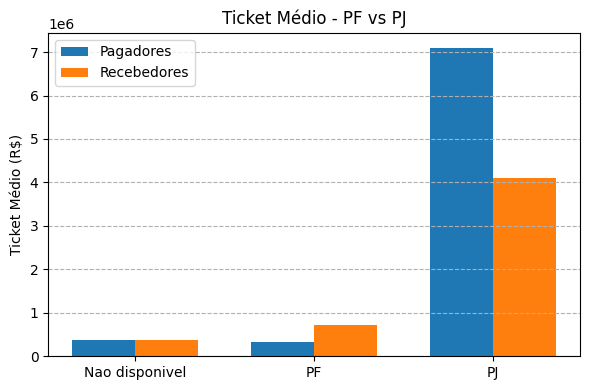

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular ticket médio
df_pix['TICKET_MEDIO'] = df_pix['VALOR'] / df_pix['QUANTIDADE']

pag_pf_pj = df_pix.groupby('PAG_PFPJ')['TICKET_MEDIO'].mean()
rec_pf_pj = df_pix.groupby('REC_PFPJ')['TICKET_MEDIO'].mean()

x = np.arange(len(pag_pf_pj.index))
width = 0.35

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(x - width/2, pag_pf_pj.values, width, label='Pagadores')
ax.bar(x + width/2, rec_pf_pj.values, width, label='Recebedores')
ax.set_xticks(x)
ax.set_xticklabels(pag_pf_pj.index)
ax.set_ylabel('Ticket Médio (R$)')
ax.set_title('Ticket Médio - PF vs PJ')
ax.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


**Interpretação**: Pessoas Jurídicas (PJ) costumam apresentar tickets médios mais altos, o que pode estar ligado a atividades comerciais. Já as Pessoas Físicas (PF) tendem a realizar transferências menores e pessoais.


### Comparação de Ticket Médio por Região


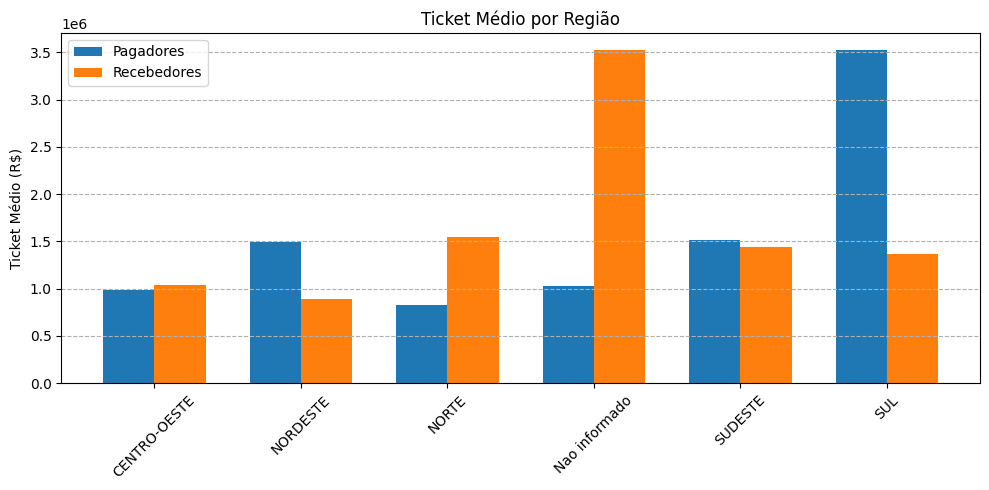

In [16]:
pag_reg = df_pix.groupby('PAG_REGIAO')['TICKET_MEDIO'].mean()
rec_reg = df_pix.groupby('REC_REGIAO')['TICKET_MEDIO'].mean()

x = np.arange(len(pag_reg.index))
width = 0.35

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x - width/2, pag_reg.values, width, label='Pagadores')
ax.bar(x + width/2, rec_reg.values, width, label='Recebedores')
ax.set_xticks(x)
ax.set_xticklabels(pag_reg.index, rotation=45)
ax.set_ylabel('Ticket Médio (R$)')
ax.set_title('Ticket Médio por Região')
ax.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

**Interpretação**: Identifica regiões com maior poder de compra ou concentração de empresas. Diferenças grandes podem indicar polos comerciais ou variações de perfil dos usuários regionais, como é o caso da região sudeste.


### Comparação de Ticket Médio por Faixa Etária


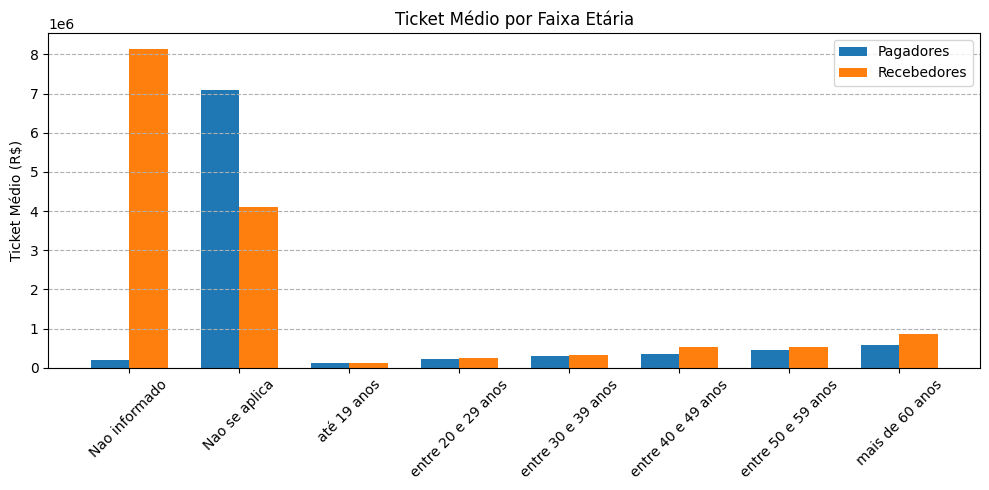

In [17]:
pag_idade = df_pix.groupby('PAG_IDADE')['TICKET_MEDIO'].mean()
rec_idade = df_pix.groupby('REC_IDADE')['TICKET_MEDIO'].mean()

x = np.arange(len(pag_idade.index))
width = 0.35

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x - width/2, pag_idade.values, width, label='Pagadores')
ax.bar(x + width/2, rec_idade.values, width, label='Recebedores')
ax.set_xticks(x)
ax.set_xticklabels(pag_idade.index, rotation=45)
ax.set_ylabel('Ticket Médio (R$)')
ax.set_title('Ticket Médio por Faixa Etária')
ax.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


**Interpretação**: Faixas etárias mais jovens tendem a realizar transações menores, enquanto faixas intermediárias (30–60 anos) geralmente concentram os maiores valores, possivelmente por razões profissionais ou familiares.


### Boxplot do Ticket Médio Geral


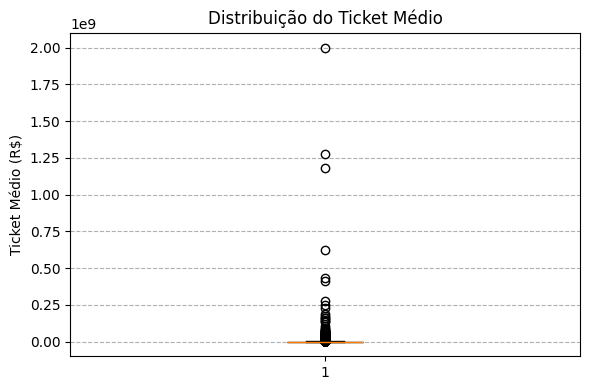

In [18]:
plt.figure(figsize=(6,4))
plt.boxplot(df_pix['TICKET_MEDIO'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribuição do Ticket Médio')
plt.ylabel('Ticket Médio (R$)')
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()


**Interpretação**: O boxplot mostra a dispersão dos tickets médios e a presença de outliers. Uma cauda longa superior pode indicar usuários com valores muito acima do típico.


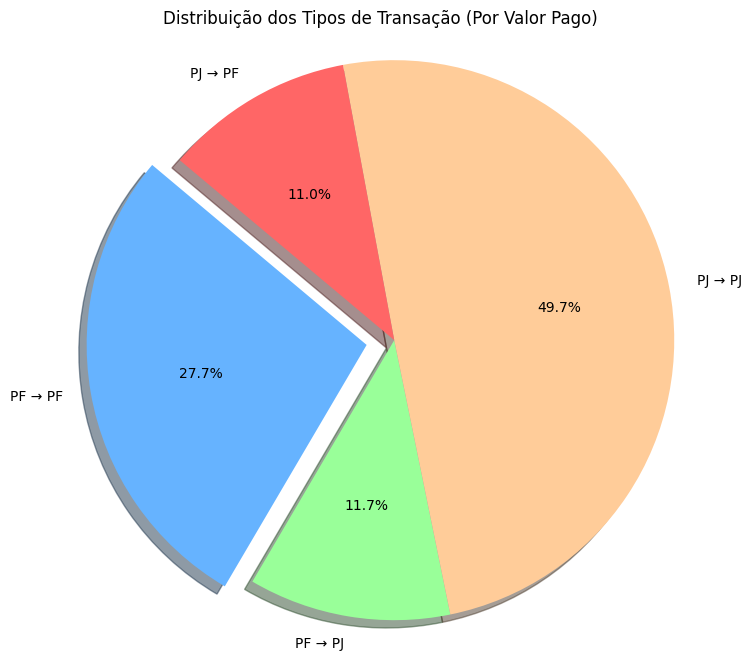

<Figure size 640x480 with 0 Axes>

In [19]:
import seaborn as sns

# Filtrando os dados para PF → PF
df_pf_to_pf = df[(df['PAG_PFPJ'] == 'PF') & (df['REC_PFPJ'] == 'PF')]

# Filtrando os dados para PF → PJ
df_pf_to_pj = df[(df['PAG_PFPJ'] == 'PF') & (df['REC_PFPJ'] == 'PJ')]

# Filtrando os dados para PJ → PJ
df_pj_to_pj = df[(df['PAG_PFPJ'] == 'PJ') & (df['REC_PFPJ'] == 'PJ')]

# Filtrando os dados para PJ → PF
df_pj_to_pf = df[(df['PAG_PFPJ'] == 'PJ') & (df['REC_PFPJ'] == 'PF')]

# Agregando os valores pagos e recebidos por mês para PF → PF
agg_values_pf_to_pf = df_pf_to_pf.groupby('AnoMes').agg({'VALOR': ['sum'], 'QUANTIDADE': ['sum']}).reset_index()

# Agregando os valores pagos e recebidos por mês para PF → PJ
agg_values_pf_to_pj = df_pf_to_pj.groupby('AnoMes').agg({'VALOR': ['sum'], 'QUANTIDADE': ['sum']}).reset_index()

# Agregando os valores pagos e recebidos por mês para PJ → PJ
agg_values_pj_to_pj = df_pj_to_pj.groupby('AnoMes').agg({'VALOR': ['sum'], 'QUANTIDADE': ['sum']}).reset_index()

# Agregando os valores pagos e recebidos por mês para PJ → PF
agg_values_pj_to_pf = df_pj_to_pf.groupby('AnoMes').agg({'VALOR': ['sum'], 'QUANTIDADE': ['sum']}).reset_index()

# Criando o gráfico de pizza para comparar a distribuição dos tipos de transações
# Calculando o total de valor pago por cada tipo de transação
total_pf_to_pf = df_pf_to_pf['VALOR'].sum()
total_pf_to_pj = df_pf_to_pj['VALOR'].sum()
total_pj_to_pj = df_pj_to_pj['VALOR'].sum()
total_pj_to_pf = df_pj_to_pf['VALOR'].sum()

# Lista para o gráfico de pizza
labels = ['PF → PF', 'PF → PJ', 'PJ → PJ', 'PJ → PF']
sizes = [total_pf_to_pf, total_pf_to_pj, total_pj_to_pj, total_pj_to_pf]
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff6666']
explode = (0.1, 0, 0, 0)  # Explodindo a fatia PF → PF para destacá-la

# Plotando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.title('Distribuição dos Tipos de Transação (Por Valor Pago)')
plt.axis('equal')  # Garantir que o gráfico seja circular
plt.show()


# Ajustando o layout para melhorar a visualização
plt.tight_layout()
plt.show()



In [20]:
# Separar os grupos de transações
df_pf_to_pf = df_pix[(df_pix['PAG_PFPJ'] == 'PF') & (df_pix['REC_PFPJ'] == 'PF')]
df_pf_to_pj = df_pix[(df_pix['PAG_PFPJ'] == 'PF') & (df_pix['REC_PFPJ'] == 'PJ')]
df_pj_to_pj = df_pix[(df_pix['PAG_PFPJ'] == 'PJ') & (df_pix['REC_PFPJ'] == 'PJ')]
df_pj_to_pf = df_pix[(df_pix['PAG_PFPJ'] == 'PJ') & (df_pix['REC_PFPJ'] == 'PF')]

# Calcular as métricas para cada grupo
def calc_metrics(df):
    # Calcular a métrica por transação (valor / quantidade)
    pix = df['VALOR'] / df['QUANTIDADE']
    return {
        'Média': pix.mean(),
        'Variância': pix.var(ddof=0),
        'Desvio Padrão': pix.std(ddof=0)
    }

# Métricas por grupo
metrics_pf_to_pf = calc_metrics(df_pf_to_pf)
metrics_pf_to_pj = calc_metrics(df_pf_to_pj)
metrics_pj_to_pj = calc_metrics(df_pj_to_pj)
metrics_pj_to_pf = calc_metrics(df_pj_to_pf)

# Exibir as métricas
print("Métricas para PF → PF:", metrics_pf_to_pf)
print("Métricas para PF → PJ:", metrics_pf_to_pj)
print("Métricas para PJ → PJ:", metrics_pj_to_pj)
print("Métricas para PJ → PF:", metrics_pj_to_pf)


Métricas para PF → PF: {'Média': np.float64(248404.31479923724), 'Variância': np.float64(921497549944.936), 'Desvio Padrão': np.float64(959946.6391133083)}
Métricas para PF → PJ: {'Média': np.float64(603230.6349133074), 'Variância': np.float64(3374745712179.0127), 'Desvio Padrão': np.float64(1837048.0974049135)}
Métricas para PJ → PJ: {'Média': np.float64(20415926.13784369), 'Variância': np.float64(9157134673874430.0), 'Desvio Padrão': np.float64(95692918.61927104)}
Métricas para PJ → PF: {'Média': np.float64(2774584.879599339), 'Variância': np.float64(2928488827555952.5), 'Desvio Padrão': np.float64(54115513.74195714)}


## Interpretação prática

### Alta dispersão nos valores

O **desvio-padrão** para as transações varia consideravelmente entre os diferentes tipos de transações:

- **PF → PF**: R$ 959.946,64
- **PF → PJ**: R$ 1.837.048,10
- **PJ → PJ**: R$ 95.692.918,62
- **PJ → PF**: R$ 54.115.513,74

Esses valores são consideravelmente maiores que as médias dos respectivos grupos. Vamos analisar o coeficiente de variação para entender melhor a dispersão relativa:

#### Coeficiente de variação

Para cada grupo, o coeficiente de variação (CV) é dado pela razão entre o **desvio-padrão** e a **média**, o que ajuda a comparar a variabilidade relativa entre diferentes tipos de transações. O cálculo do coeficiente de variação para cada grupo seria:

- **PF → PF**: 
  $$ \frac{959.946,64}{248.404,31} \approx 3,86 $$

- **PF → PJ**: 
  $$ \frac{1.837.048,10}{603.230,63} \approx 3,05 $$

- **PJ → PJ**: 
  $$ \frac{95.692.918,62}{20.415.926,14} \approx 4,68 $$

- **PJ → PF**: 
  $$ \frac{54.115.513,74}{2.774.584,88} \approx 19,5 $$

Esses valores indicam que as transações **PJ → PF** possuem a maior dispersão relativa em relação à sua média, seguido por **PJ → PJ**. Por outro lado, **PF → PF** e **PF → PJ** possuem coeficientes de variação mais baixos, indicando uma maior estabilidade nas transações.

---

### Intervalo de confiança típico

Assumindo que a distribuição das transações em cada grupo seja simétrica (o que, na realidade, não é garantido devido à presença de outliers), podemos estimar o intervalo de confiança de **68% dos registros** (1 desvio-padrão acima e abaixo da média):

- **PF → PF**: 
  $$ 248.404,31 \pm 959.946,64 \Rightarrow [-711.542,33, 1.208.350,95] $$

- **PF → PJ**: 
  $$ 603.230,63 \pm 1.837.048,10 \Rightarrow [-1.233.817,47, 2.836.078,73] $$

- **PJ → PJ**: 
  $$ 20.415.926,14 \pm 95.692.918,62 \Rightarrow [-75.276.992,48, 95.108.834,76] $$

- **PJ → PF**: 
  $$ 2.774.584,88 \pm 54.115.513,74 \Rightarrow [-51.340.928,87, 58.230.964,47] $$

Esses intervalos ilustram como a presença de **outliers** e valores muito altos podem gerar limites inferiores negativos, o que não faz sentido no contexto financeiro. Isso reforça a hipótese de que as distribuições são **assimétricas**, provavelmente com uma **cauda longa positiva**, onde alguns valores muito altos distorcem a média.

---

### Possíveis causas da alta variabilidade

1. **Mistura de perfis de usuários**:
   - **Pessoas jurídicas** (PJ) costumam realizar transações de grande valor, como pagamentos de fornecedores ou salários.
   - **Pessoas físicas** (PF) geralmente realizam transações menores, como pagamentos de contas ou transferências pessoais. Isso pode explicar a maior variabilidade nas transações envolvendo PJ.

2. **Outliers significativos**:
   - Transações de valor extremamente alto, como grandes transferências corporativas ou pagamentos de grandes quantias entre PJ, podem distorcer a média e aumentar a variância, como visto nos grupos **PJ → PJ** e **PJ → PF**.

3. **Distribuição assimétrica**:
   - A presença de grandes valores transacionados por PJ pode criar uma **distribuição assimétrica**, onde a maior parte das transações são menores, mas há uma pequena quantidade de transações de valor muito elevado, criando um "efeito de cauda longa".

## Comparação entre o modelo anterior e o modelo com grupos separados

### Análise do Modelo Agregado

No modelo agregado (onde todos os tipos de transações são considerados juntos), o **desvio-padrão** é bastante elevado (R$ 28.755.110,34), refletindo a grande dispersão no valor das transações. A média de **R$ 1.563.718,84** é distorcida devido à presença de transações muito altas, como as realizadas por **Pessoas Jurídicas** (PJ).

#### Coeficiente de variação no modelo agregado:
$$ \frac{28.755.110,34}{1.563.718,84} \approx 18,4 $$

Este coeficiente de variação extremamente elevado sugere que a variabilidade das transações é muito alta, com a média não representando bem o comportamento típico das transações.

### Análise dos Grupos Separados

Ao separar os dados em grupos distintos (PF → PF, PF → PJ, PJ → PJ, PJ → PF), conseguimos identificar **diferentes padrões de variabilidade**:

- **PF → PF** e **PF → PJ** têm uma **menor dispersão** relativa (coeficiente de variação em torno de 3), o que indica que esses grupos têm transações mais estáveis.
- **PJ → PJ** e **PJ → PF** apresentam **coeficientes de variação muito mais altos**, refletindo uma maior dispersão, especialmente no grupo **PJ → PF**, com **coeficiente de variação de 19,5**, indicando uma variabilidade muito mais acentuada.

---

## Conclusão

A análise separada dos grupos mostra uma **dispersão muito maior** em transações envolvendo **Pessoas Jurídicas** (PJ), especialmente em transações **PJ → PF**. O modelo agregado, ao combinar todos os tipos de transações, apresenta um desvio-padrão muito alto, o que pode ser explicado pela **mistura de perfis de usuários** e pela **presença de outliers**.

Assim, a **média simples** não é uma boa representação do comportamento das transações, especialmente quando há **valores extremos**. Para uma análise mais precisa, recomenda-se **segregar os dados por tipo de transação (PF → PF, PF → PJ, PJ → PJ, PJ → PF)**, e utilizar **medianas** ou **médias ponderadas** para representar de forma mais adequada a tendência central de cada grupo.

C:\Users\caiob\AppData\Local\Temp\ipykernel_16120\3490135664.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['PF → PF', 'PF → PJ', 'PJ → PJ', 'PJ → PF'])


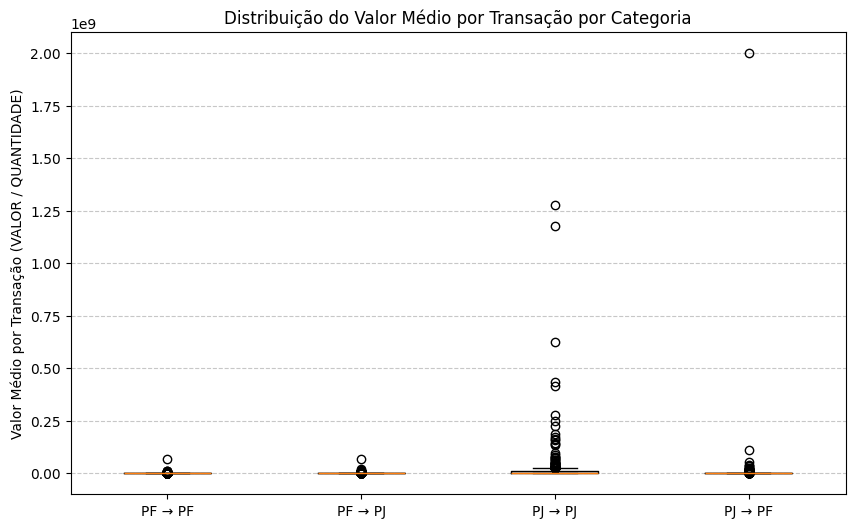

In [21]:
# Calcular a métrica por transação para cada grupo e armazenar em listas
pix_pf_to_pf = df_pf_to_pf['VALOR'] / df_pf_to_pf['QUANTIDADE']
pix_pf_to_pj = df_pf_to_pj['VALOR'] / df_pf_to_pj['QUANTIDADE']
pix_pj_to_pj = df_pj_to_pj['VALOR'] / df_pj_to_pj['QUANTIDADE']
pix_pj_to_pf = df_pj_to_pf['VALOR'] / df_pj_to_pf['QUANTIDADE']

# Preparar os dados para o boxplot
data = [pix_pf_to_pf, pix_pf_to_pj, pix_pj_to_pj, pix_pj_to_pf]

# Criar o boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['PF → PF', 'PF → PJ', 'PJ → PJ', 'PJ → PF'])
plt.title('Distribuição do Valor Médio por Transação por Categoria')
plt.ylabel('Valor Médio por Transação (VALOR / QUANTIDADE)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()



In [23]:
df.to_csv('transacaoPIXmod.csv', sep=';', decimal=',')